# Chapter.3 Single-variate Linear Regression without Bias Term

## Programming Assignment.3-01 Gradient Descent Method

이번 PA 03-01에서는 기본적인 NumPy와 Matplotlib의 사용법을 익히고, Gradient Descent Method을 이용하여 predictor를 학습시켜 봅니다.

PA 03-01은 다음과 같은 단계로 이루어집니다.

<ul>
    <li> Step.1 Dataset Generation </li>    
    NumPy를 이용하여 PA 03-01에 필요한 dataset을 만듭니다.
    <li> Step.2 Gradient Descent Method </li>
    GDM을 이용하여 predictor를 학습시킵니다.
    <li> Step.3 Predictor Visualization </li>
    predictor가 학습되는 모습을 시각화하여 제대로 학습이 일어나는지 확인합니다.        
</ul>

먼저 다음 셀을 실행시켜 필요한 library들을 import하세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 Dataset Generation

### Target Function
linear regression model을 학습시키기 위한 dataset을 먼저 만들어봅니다. dataset은

$$y = 3x$$

에서부터 만들어지며, 따라서 target function은 $y = 3x$입니다.

***
**Programming**

먼저 x값을 기준으로 -3부터 3까지 target function을 그려봅니다.

(Hint.1) 직선을 그리기 위해선 시작점, 끝점 2개가 필요합니다.

(Hint.2) np.linspace()



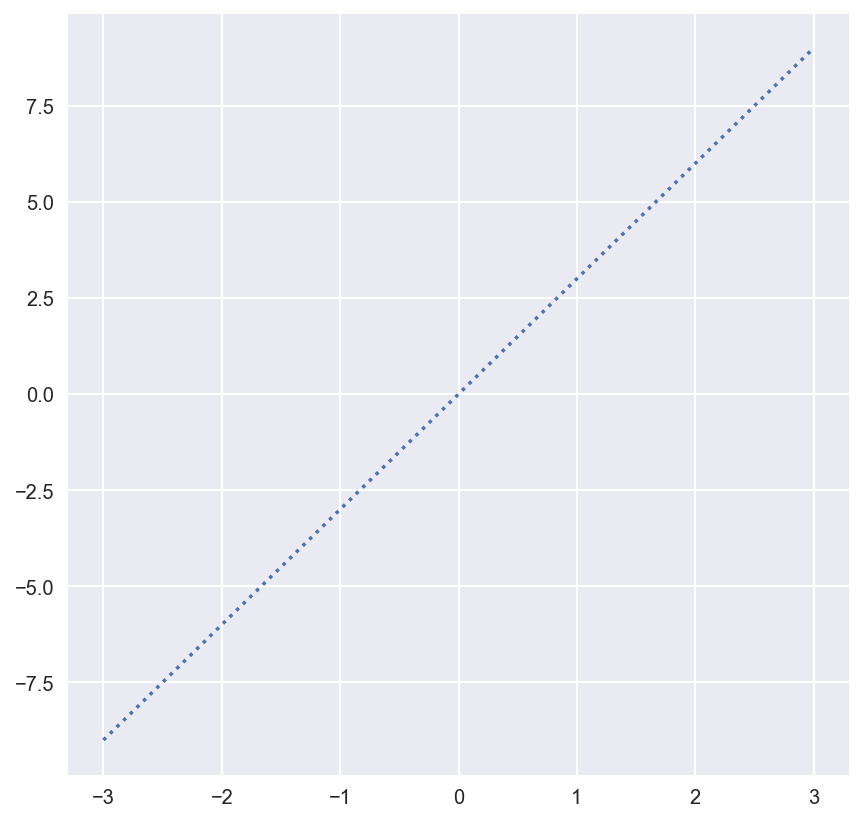

In [3]:
##### Start Your Code(Targer Function) #####
t_x = np.linspace(-3, 3, 100)
t_y = 3*t_x
##### End Your Code(Targer Function) #####

fig, ax = plt.subplots(figsize = (7,7))
ax.plot(t_x, t_y, linestyle = ':')

**Expected Output**
<img src="./imgs/3_01_01.png" width = 300>

### Data Samples

signle-variate linear regression의 dataset은 1개의 x값과 그에 따른 1개의 y값으로 이루어집니다.

그리고 target function과 같은 함수에서부터 만들어지며 Gaussian noise가 추가됩니다.

***
**Programming**

PA 03-01에서는 100개의 data sample들을 standard normal distribution에서부터 만들고, noise도 마찬가지로 standard normal distribution에서부터 만들어진 Gaussian noise를 추가합니다. 이때 Gaussian noise에 0.5를 곱해줍니다.

(Hint.1) np.random.normal( )

Text(0, 0.5, 'y data')

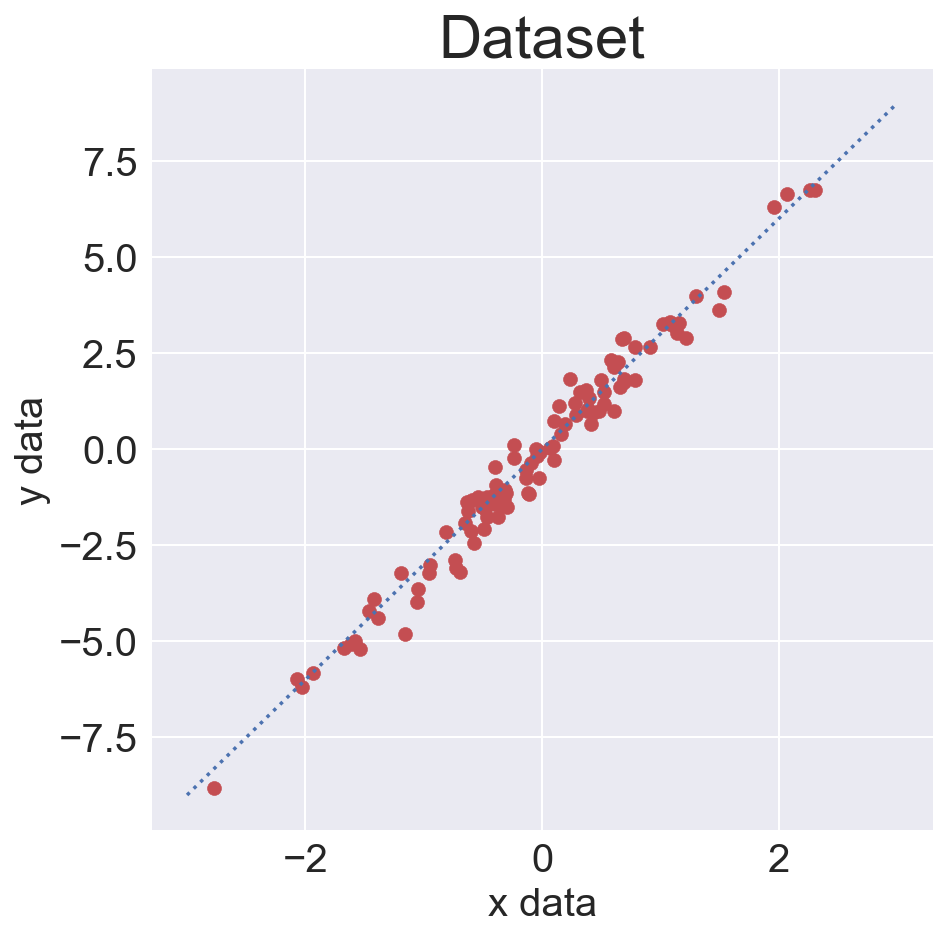

In [5]:
##### Start Your Code(Dataset Generation) #####
n_sample = 100
x_data = np.random.normal(size = n_sample)
y_data = 3*x_data  + 0.5*np.random.normal(size = n_sample)
##### End Your Code(Dataset Generation) #####

# Target Function Visualization
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(t_x, t_y, linestyle = ':')

# Dataset Visualization
ax.scatter(x_data, y_data, color = 'r')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_title("Dataset", fontsize = 30)
ax.set_xlabel("x data", fontsize = 20)
ax.set_ylabel("y data", fontsize = 20)

**Expected Output**
<img src="./imgs/3_01_02.png" width = 400>

***
## Step.2 Gradient Descent Method

위의 dataset에 따라 predictor는
$$ \hat{y} = \theta x$$
로 설정할 수 있습니다.

그리고 i번째 data sample에 대한 loss($\mathcal{L}^{(i)}$)는 
$$ \mathcal{L}^{(i)} = (y^{(i)} - \hat{y}^{(i)})^{2} = (y^{(i)} - \theta x^{(i)})^{2}$$
로 정의됩니다.

따라서 $\theta$에 대한 $\mathcal{L}^{(i)}$의 partial derivative는
$$ \frac{\partial \mathcal{L}^{(i)}}{\partial \theta} = -2x^{(i)}(y^{(i)} - \hat{y}^{(i)})$$
입니다.

마지막으로 이를 이용한 Gradient descent method는

$$ \theta := \theta - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial \theta}$$

$$ = \theta + 2\alpha x^{(i)}(y^{(i)} - \hat{y}^{(i)})$$
입니다.

***
**Programming**

initial theta(th)는 0.1, learning rate(lr)는 0.001, 총 epoch(epochs)는 50으로 설정하고 gradient descent method를 이용하여 optimal theta에 대한 approximation을 진행하세요.

(Hint.1) $\theta$의 변화와 loss를 추적하기 위하여 빈 리스트 th_list, loss_list를 각각 만들어줍니다.

In [6]:
x_data

array([-0.36918184, -0.23937918,  1.0996596 ,  0.65526373,  0.64013153,
       -1.61695604, -0.02432612, -0.73803091,  0.2799246 , -0.09815039,
        0.91017891,  0.31721822,  0.78632796, -0.4664191 , -0.94444626,
       -0.41004969, -0.01702041,  0.37915174,  2.25930895, -0.04225715,
       -0.955945  , -0.34598178, -0.46359597,  0.48148147, -1.54079701,
        0.06326199,  0.15650654,  0.23218104, -0.59731607, -0.23792173,
       -1.42406091, -0.49331988, -0.54286148,  0.41605005, -1.15618243,
        0.7811981 ,  1.49448454, -2.06998503,  0.42625873,  0.67690804,
       -0.63743703, -0.39727181, -0.13288058, -0.29779088, -0.30901297,
       -1.67600381,  1.15233156,  1.07961859, -0.81336426, -1.46642433,
        0.52106488, -0.57578797,  0.14195316, -0.31932842,  0.69153875,
        0.69474914, -0.72559738, -1.38336396, -1.5829384 ,  0.61037938,
       -1.18885926, -0.50681635, -0.59631404, -0.0525673 , -1.93627981,
        0.1887786 ,  0.52389102,  0.08842209, -0.31088617,  0.09

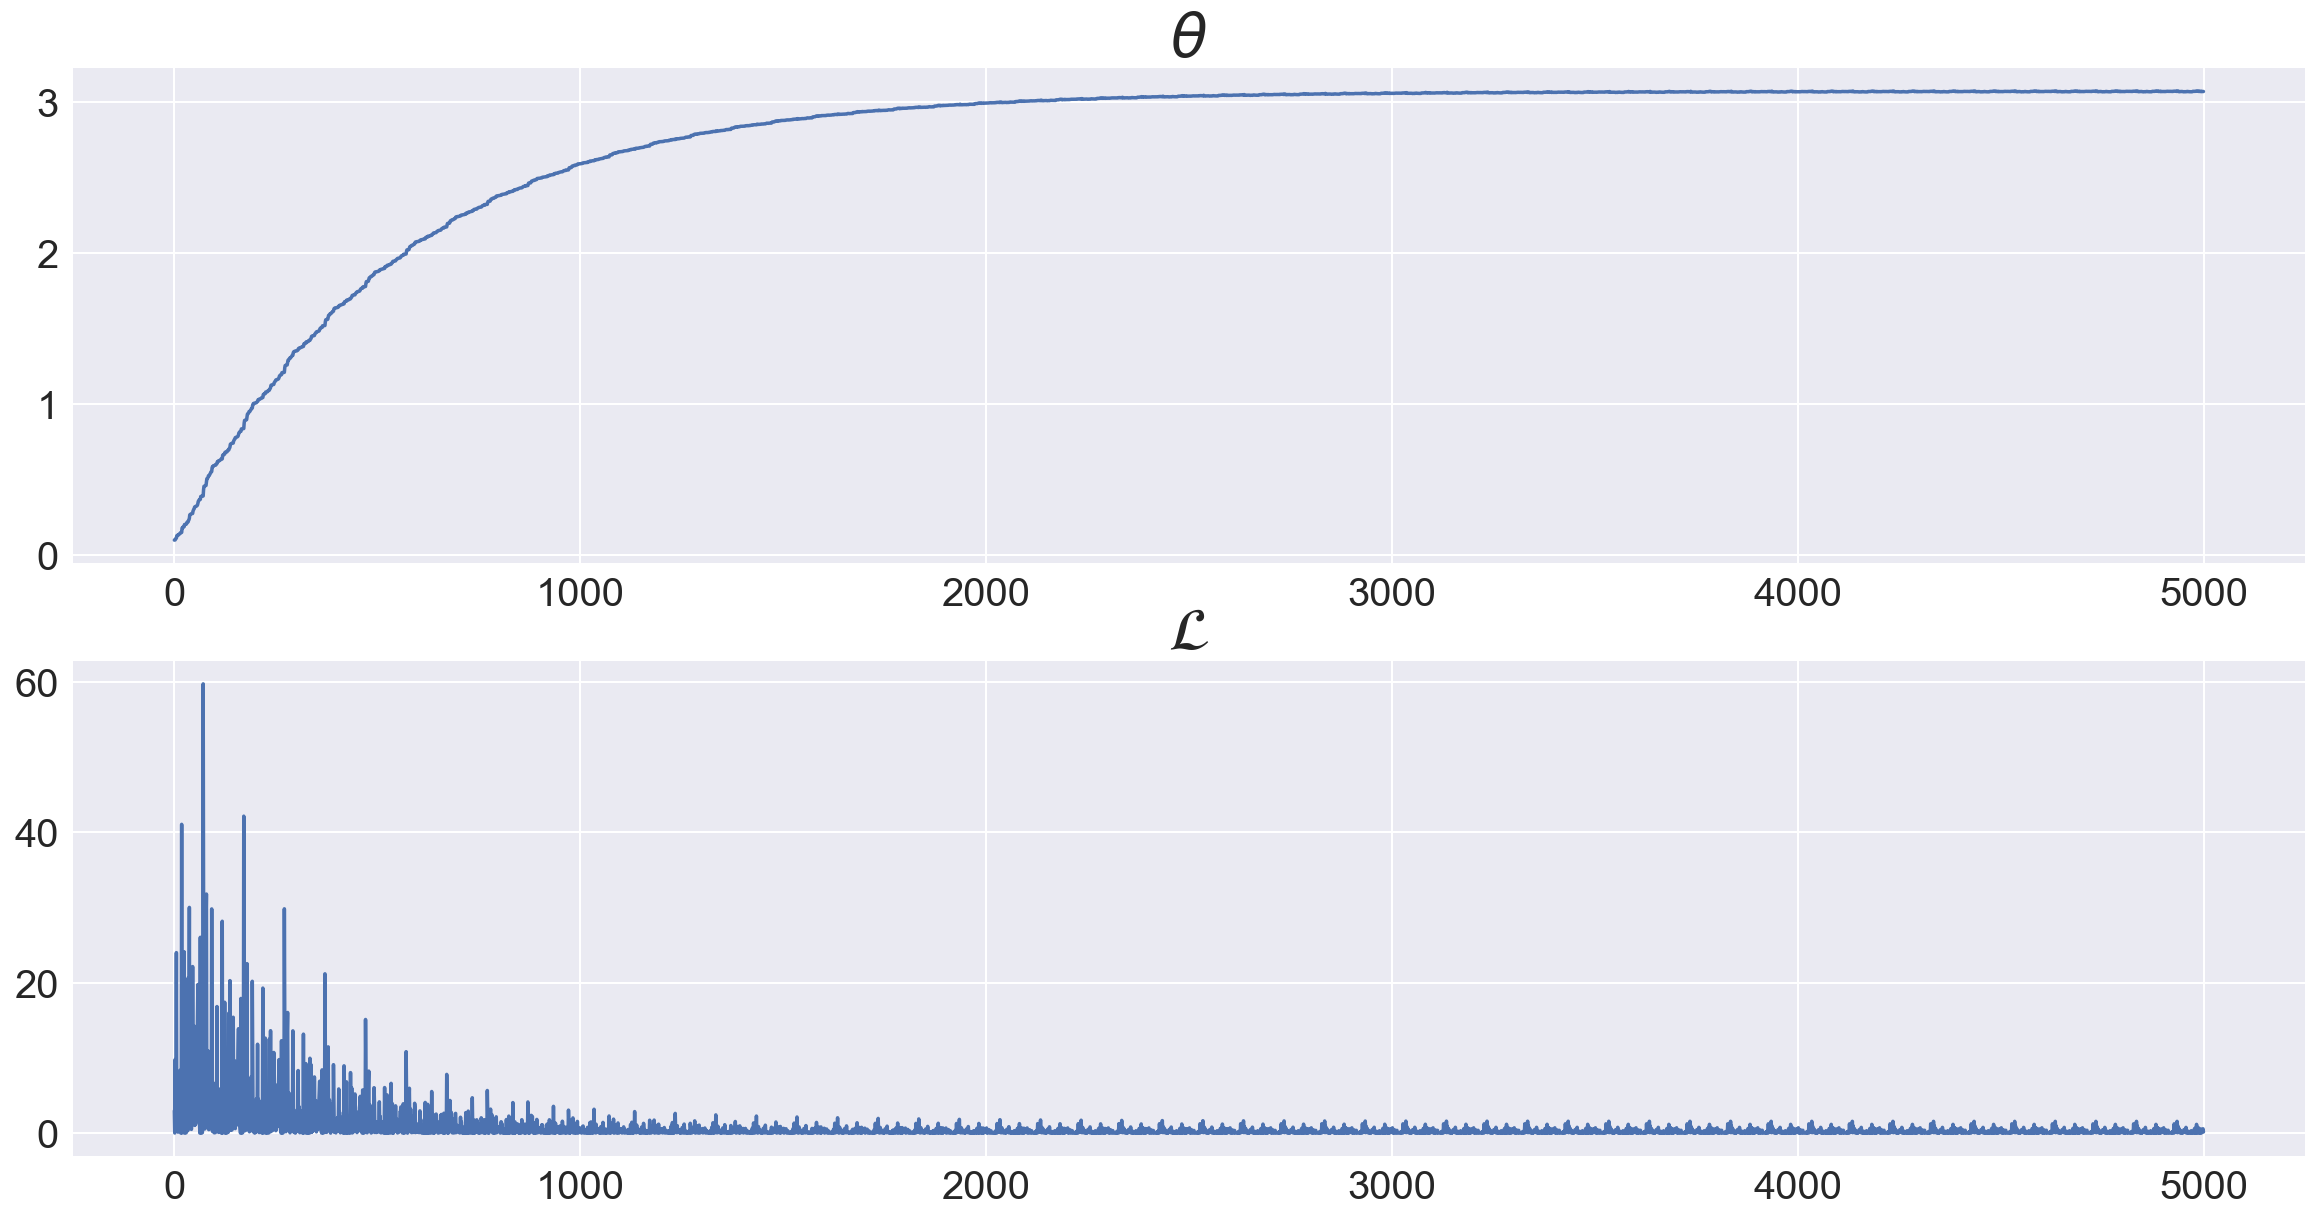

In [7]:
##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.001
epochs = 50
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []

for epoch in range(epochs):
    for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
        ##### Start Your Code(Loss Calculation) #####
        pred = th * x
        loss = (y - pred)**2
        ##### End Your Code(Loss Calculation) #####

        th_list.append(th)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Descent Method) #####
        th = th + 2*lr*x*(y - pred)
        ##### End Your Code(Gradient Descent Method) #####
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(th_list)
ax[1].plot(loss_list)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

**Expected Output**
<img src="./imgs/3_01_03.png">

***
## Step.3 Predictor Visualization

다음 셀을 실행하여 초기 predictor $\hat{y} = 0.1x$가 학습을 거쳐 dataset을 잘 표현하는 predictor로 학습되는지 확인하세요.

In [9]:
len(th_list)

5000

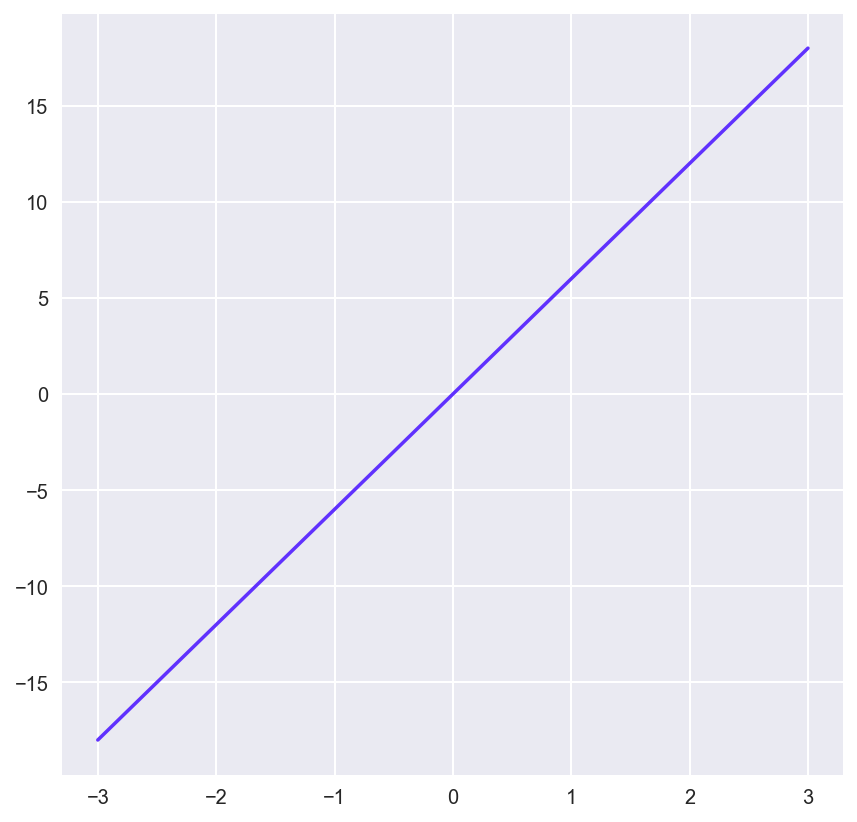

In [25]:
fig, ax = plt.subplots(figsize = (7,7))
cmap = cm.get_cmap('rainbow', lut = 50)
ax.plot(x_range, x_range*6,
            color = cmap(3),
            alpha = 1)

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(x_data, y_data, color = 'r')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_title("Dataset", fontsize = 30)
ax.set_xlabel("x data", fontsize = 20)
ax.set_ylabel("y data", fontsize = 20)

x_range = np.linspace(-3, 3, 2)
cmap = cm.get_cmap('rainbow', lut = len(th_list))
for th_idx, th in enumerate(th_list):
    predictor = th*x_range
    ax.plot(x_range, predictor,
            color = cmap(th_idx),
            alpha = 0.01)

**Expected Output**
<img src="./imgs/3_01_04.png" width = 400>